# [**剑指 Offer 20. 表示数值的字符串**](https://leetcode-cn.com/problems/biao-shi-shu-zhi-de-zi-fu-chuan-lcof)
难度：中等
>请实现一个函数用来判断字符串是否表示数值（包括整数和小数）。
>例如，字符串"+100"、"5e2"、"-123"、"3.1416"、"-1E-16"、"0123"都表示数值，但"12e"、"1a3.14"、"1.2.3"、"+-5"及"12e+5.4"都不是。

In [ ]:
class Solution:
    def isNumber(self, s: str) -> bool:
        try:
            float(s)
            return True
        except:
            return False


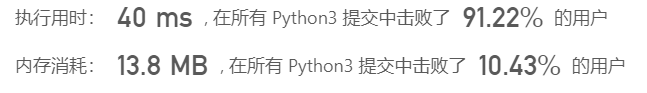

# **表示数值的字符串**
*力扣官方题解*
>作者：LeetCode-Solution
>链接：https://leetcode-cn.com/problems/biao-shi-shu-zhi-de-zi-fu-chuan-lcof/solution/biao-shi-shu-zhi-de-zi-fu-chuan-by-leetcode-soluti/
>来源：力扣（LeetCode）
>著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

方法一：确定有限状态自动机
预备知识

确定有限状态自动机（以下简称「自动机」）是一类计算模型。它包含一系列状态，这些状态中：

有一个特殊的状态，被称作「初始状态」。
还有一系列状态被称为「接受状态」，它们组成了一个特殊的集合。其中，一个状态可能既是「初始状态」，也是「接受状态」。
起初，这个自动机处于「初始状态」。随后，它顺序地读取字符串中的每一个字符，并根据当前状态和读入的字符，按照某个事先约定好的「转移规则」，从当前状态转移到下一个状态；当状态转移完成后，它就读取下一个字符。当字符串全部读取完毕后，如果自动机处于某个「接受状态」，则判定该字符串「被接受」；否则，判定该字符串「被拒绝」。

注意：如果输入的过程中某一步转移失败了，即不存在对应的「转移规则」，此时计算将提前中止。在这种情况下我们也判定该字符串「被拒绝」。

一个自动机，总能够回答某种形式的「对于给定的输入字符串 S，判断其是否满足条件 P」的问题。在本题中，条件 P 即为「构成合法的表示数值的字符串」。

自动机驱动的编程，可以被看做一种暴力枚举方法的延伸：它穷尽了在任何一种情况下，对应任何的输入，需要做的事情。

自动机在计算机科学领域有着广泛的应用。在算法领域，它与大名鼎鼎的字符串查找算法「KMP」算法有着密切的关联；在工程领域，它是实现「正则表达式」的基础。

问题描述

在 C++ 文档 中，描述了一个合法的数值字符串应当具有的格式。具体而言，它包含以下部分：

符号位，即 ++、-− 两种符号
整数部分，即由若干字符 0-90−9 组成的字符串
小数点
小数部分，其构成与整数部分相同
指数部分，其中包含开头的字符 \text{e}e（大写小写均可）、可选的符号位，和整数部分
相比于 C++ 文档而言，本题还有一点额外的不同，即允许字符串首末两端有一些额外的空格。

在上面描述的五个部分中，每个部分都不是必需的，但也受一些额外规则的制约，如：

如果符号位存在，其后面必须跟着数字或小数点。
小数点的前后两侧，至少有一侧是数字。
思路与算法

根据上面的描述，现在可以定义自动机的「状态集合」了。那么怎么挖掘出所有可能的状态呢？一个常用的技巧是，用「当前处理到字符串的哪个部分」当作状态的表述。根据这一技巧，不难挖掘出所有状态：

起始的空格
符号位
整数部分
左侧有整数的小数点
左侧无整数的小数点（根据前面的第二条额外规则，需要对左侧有无整数的两种小数点做区分）
小数部分
字符 \text{e}e
指数部分的符号位
指数部分的整数部分
末尾的空格
下一步是找出「初始状态」和「接受状态」的集合。根据题意，「初始状态」应当为状态 1，而「接受状态」的集合则为状态 3、状态 4、状态 6、状态 9 以及状态 10。换言之，字符串的末尾要么是空格，要么是数字，要么是小数点，但前提是小数点的前面有数字。

最后，需要定义「转移规则」。结合数值字符串应当具备的格式，将自动机转移的过程以图解的方式表示出来：



比较上图与「预备知识」一节中对自动机的描述，可以看出有一点不同：

我们没有单独地考虑每种字符，而是划分为若干类。由于全部 1010 个数字字符彼此之间都等价，因此只需定义一种统一的「数字」类型即可。对于正负号也是同理。
在实际代码中，我们需要处理转移失败的情况。例如当位于状态 1（起始空格）时，没有对应字符 \text{e}e 的状态。为了处理这种情况，我们可以创建一个特殊的拒绝状态。如果当前状态下没有对应读入字符的「转移规则」，我们就转移到这个特殊的拒绝状态。一旦自动机转移到这个特殊状态，我们就可以立即判定该字符串不「被接受」。

代码

可以很简单地将上面的状态转移图翻译成代码：

Python3
```python
from enum import Enum

class Solution:
    def isNumber(self, s: str) -> bool:
        State = Enum("State", [
            "STATE_INITIAL",
            "STATE_INT_SIGN",
            "STATE_INTEGER",
            "STATE_POINT",
            "STATE_POINT_WITHOUT_INT",
            "STATE_FRACTION",
            "STATE_EXP",
            "STATE_EXP_SIGN",
            "STATE_EXP_NUMBER",
            "STATE_END",
        ])
        Chartype = Enum("Chartype", [
            "CHAR_NUMBER",
            "CHAR_EXP",
            "CHAR_POINT",
            "CHAR_SIGN",
            "CHAR_SPACE",
            "CHAR_ILLEGAL",
        ])

        def toChartype(ch: str) -> Chartype:
            if ch.isdigit():
                return Chartype.CHAR_NUMBER
            elif ch.lower() == "e":
                return Chartype.CHAR_EXP
            elif ch == ".":
                return Chartype.CHAR_POINT
            elif ch == "+" or ch == "-":
                return Chartype.CHAR_SIGN
            elif ch == " ":
                return Chartype.CHAR_SPACE
            else:
                return Chartype.CHAR_ILLEGAL
        
        transfer = {
            State.STATE_INITIAL: {
                Chartype.CHAR_SPACE: State.STATE_INITIAL,
                Chartype.CHAR_NUMBER: State.STATE_INTEGER,
                Chartype.CHAR_POINT: State.STATE_POINT_WITHOUT_INT,
                Chartype.CHAR_SIGN: State.STATE_INT_SIGN,
            },
            State.STATE_INT_SIGN: {
                Chartype.CHAR_NUMBER: State.STATE_INTEGER,
                Chartype.CHAR_POINT: State.STATE_POINT_WITHOUT_INT,
            },
            State.STATE_INTEGER: {
                Chartype.CHAR_NUMBER: State.STATE_INTEGER,
                Chartype.CHAR_EXP: State.STATE_EXP,
                Chartype.CHAR_POINT: State.STATE_POINT,
                Chartype.CHAR_SPACE: State.STATE_END,
            },
            State.STATE_POINT: {
                Chartype.CHAR_NUMBER: State.STATE_FRACTION,
                Chartype.CHAR_EXP: State.STATE_EXP,
                Chartype.CHAR_SPACE: State.STATE_END,
            },
            State.STATE_POINT_WITHOUT_INT: {
                Chartype.CHAR_NUMBER: State.STATE_FRACTION,
            },
            State.STATE_FRACTION: {
                Chartype.CHAR_NUMBER: State.STATE_FRACTION,
                Chartype.CHAR_EXP: State.STATE_EXP,
                Chartype.CHAR_SPACE: State.STATE_END,
            },
            State.STATE_EXP: {
                Chartype.CHAR_NUMBER: State.STATE_EXP_NUMBER,
                Chartype.CHAR_SIGN: State.STATE_EXP_SIGN,
            },
            State.STATE_EXP_SIGN: {
                Chartype.CHAR_NUMBER: State.STATE_EXP_NUMBER,
            },
            State.STATE_EXP_NUMBER: {
                Chartype.CHAR_NUMBER: State.STATE_EXP_NUMBER,
                Chartype.CHAR_SPACE: State.STATE_END,
            },
            State.STATE_END: {
                Chartype.CHAR_SPACE: State.STATE_END,
            },
        }

        st = State.STATE_INITIAL
        for ch in s:
            typ = toChartype(ch)
            if typ not in transfer[st]:
                return False
            st = transfer[st][typ]
        
        return st in [State.STATE_INTEGER, State.STATE_POINT, State.STATE_FRACTION, State.STATE_EXP_NUMBER, State.STATE_END]
```
复杂度分析

时间复杂度：O(N)O(N)，其中 NN 为字符串的长度。我们需要遍历字符串的每个字符，其中状态转移所需的时间复杂度为 O(1)O(1)。
空间复杂度：O(1)O(1)。只需要创建固定大小的状态转移表。

